In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#para poner las rutas de los archivos en otro documento y esta funcion es para leer dicho documento

"""import yaml

try:
    with open(r"C:\Users;:::::config.yaml", 'r') as file:
        config = yaml.safe_load(file)
        print(config['data']['pt1'])  
except Exception as e:
    print(f"Error reading the config file: {e}")

"""


In [3]:
df1 = pd.read_csv("df_final_demo.txt")
df2 = pd.read_csv("df_final_experiment_clients.txt")
df3 = pd.read_csv("df_final_web_data_pt_1.txt")
df4 = pd.read_csv("df_final_web_data_pt_2.txt")

In [91]:
df1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.00,73.00,60.50,U,2.00,45105.30,6.00,9.00
1,2304905,7.00,94.00,58.00,U,2.00,110860.30,6.00,9.00
2,1439522,5.00,64.00,32.00,U,2.00,52467.79,6.00,9.00
3,1562045,16.00,198.00,49.00,M,2.00,67454.65,3.00,6.00
4,5126305,12.00,145.00,33.00,F,2.00,103671.75,0.00,3.00
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.00,56.00,38.50,U,3.00,1411062.68,5.00,5.00
70605,8981690,12.00,148.00,31.00,M,2.00,101867.07,6.00,6.00
70606,333913,16.00,198.00,61.50,F,2.00,40745.00,3.00,3.00
70607,1573142,21.00,255.00,68.00,M,3.00,475114.69,4.00,4.00


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [92]:
df2

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [4]:
#Eliminamos los usuarios que no participan en la prueba
df2 = df2.dropna(subset = ["Variation"])

In [5]:
#Juntamos las dos tablas que contenian datos de los usuarios
df_clientes = pd.merge(df2, df1, on='client_id')

In [77]:
df_clientes

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.00,64.00,79.00,U,2.00,189023.86,1.00,4.00
1,8320017,Test,22.00,274.00,34.50,M,2.00,36001.90,5.00,8.00
2,4033851,Control,12.00,149.00,63.50,M,2.00,142642.26,5.00,8.00
3,1982004,Test,6.00,80.00,44.50,U,2.00,30231.76,1.00,4.00
4,9294070,Control,5.00,70.00,29.00,U,2.00,34254.54,0.00,3.00
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.00,191.00,52.50,M,2.00,60344.67,1.00,4.00
50496,2908510,Control,21.00,252.00,34.00,M,3.00,141808.05,6.00,9.00
50497,7230446,Test,6.00,74.00,62.00,M,2.00,58778.11,2.00,5.00
50498,5230357,Test,23.00,278.00,30.50,M,2.00,61349.70,0.00,3.00


In [64]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.DataFrame(df_clientes.describe())

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,50500.00,50488.00,50488.00,50487.00,50488.00,50488.00,50488.00,50488.00
mean,5006179.06,12.03,150.42,47.32,2.25,149514.68,3.09,6.13
std,2877442.53,6.86,81.94,15.52,0.53,302036.42,2.19,2.18
min,555.00,2.00,33.00,17.00,1.00,23789.44,0.00,3.00
25%,2515645.75,6.00,82.00,33.50,2.00,39878.41,1.00,4.00
50%,5025103.50,11.00,136.00,48.00,2.00,65733.60,3.00,6.00
75%,7477933.25,16.00,192.00,59.50,2.00,139956.54,5.00,8.00
max,9999832.00,55.00,669.00,96.00,7.00,16320040.15,6.00,9.00


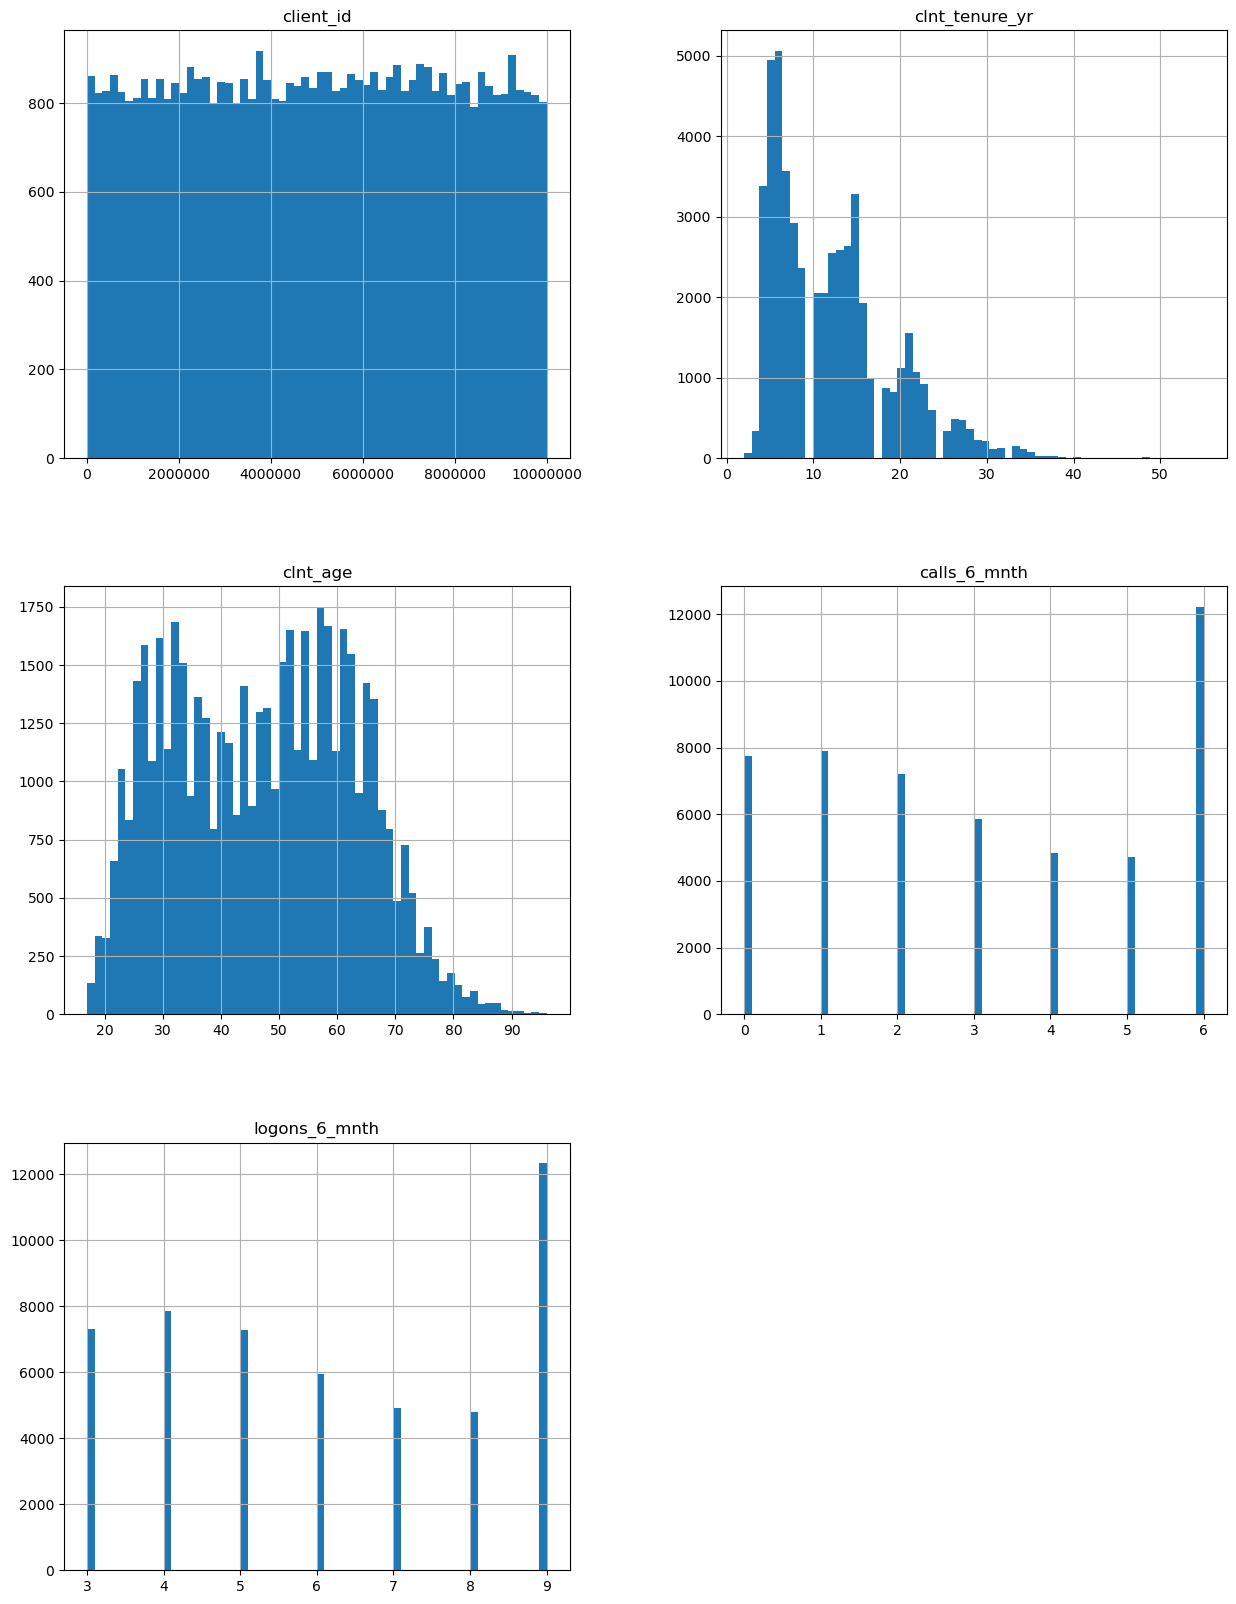

In [10]:
ax = df_clientes.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
for axis in ax.flatten():
    axis.ticklabel_format(style='plain', axis='x')

plt.show()

En este histograma podemos ver que la mayoria de los clientes que participaron en las pruebas han estado en la applicacion menos de 10 anyos aunque hay otro numero bastante grande que han estado 12-16 anyos.
En el tema de las edades esta muy bien repartido ya que como podemos ver la mayoria se situa entre 24 y 66 anyos.

In [9]:
#Eliminamos las tablas de bal y num_accts ya que mas del 80% son iguales y no nos afecta en esta prueba y tambien la de antiguedad por mes ya que cogeremos las antiguedades por anyo.
columnas_eliminar = ["clnt_tenure_mnth", "num_accts", "bal"]

df_clientes = df_clientes.drop(columns=columnas_eliminar)

In [96]:
df_clientes['gendr'].value_counts()

gendr
U    17280
M    16947
F    16259
X        2
Name: count, dtype: int64

In [6]:
#Aqui cojemos los dos generos que estaban con X y los cambiamos por U.

df_clientes["gendr"] = df_clientes["gendr"].replace({"X":"U"})

<Axes: ylabel='count'>

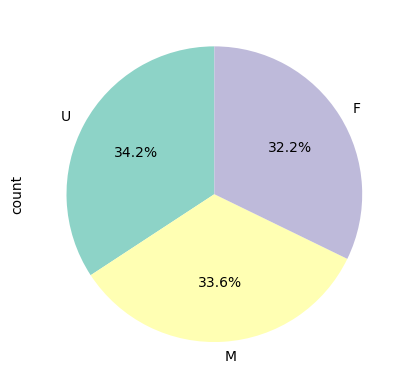

In [99]:
df_clientes['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
#Aqui vemos que un tercio no nos han especificado de que genero son.

<Axes: ylabel='count'>

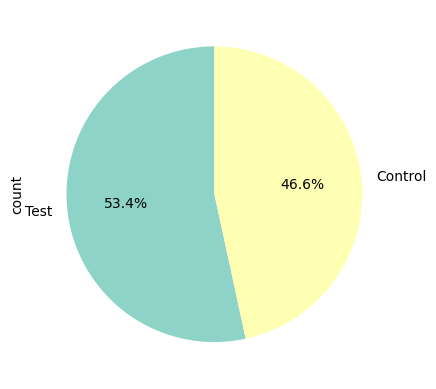

In [103]:
df_clientes['Variation'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
#Aqui podemos ver que hay mas gente en la prueba de test que en la de control.

In [7]:
df_clientes[df_clientes["clnt_age"].isnull()]

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
5171,8191345,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7131,5144725,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8902,7616759,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18742,2222915,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19391,5277910,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23678,8412164,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36137,8611797,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36245,355337,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38552,4666211,Control,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
38599,1227228,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Miramos los datos de los clientes que no tienen edad y al no tener ningun otro dato los eliminamos.
df_clientes = df_clientes.dropna()

In [102]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50487 entries, 0 to 50499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         50487 non-null  int64  
 1   Variation         50487 non-null  object 
 2   clnt_tenure_yr    50487 non-null  float64
 3   clnt_tenure_mnth  50487 non-null  float64
 4   clnt_age          50487 non-null  float64
 5   gendr             50487 non-null  object 
 6   num_accts         50487 non-null  float64
 7   bal               50487 non-null  float64
 8   calls_6_mnth      50487 non-null  float64
 9   logons_6_mnth     50487 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.2+ MB


In [65]:
df3

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB


In [16]:
df3["process_step"].value_counts()

process_step
start      108910
step_1      73432
step_2      61768
step_3      53628
confirm     45403
Name: count, dtype: int64

In [66]:
df4

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [17]:
df4["process_step"].value_counts()

process_step
start      135035
step_1      89761
step_2      71294
step_3      58614
confirm     57560
Name: count, dtype: int64

In [58]:
df4["visit_id"].value_counts()

visit_id
875138661_34710212496_881092    104
518285126_8572733997_709761      88
961878360_85895454962_607105     80
602953935_48759866176_238903     80
308874104_3998249411_902973      72
                               ... 
270241178_77399024943_627437      1
38947543_97654671467_821686       1
141952089_36243572851_865205      1
500650289_63394211715_263432      1
86152093_47511127657_716022       1
Name: count, Length: 82841, dtype: int64

In [59]:
df4["visitor_id"].value_counts()

visitor_id
722943003_3441581446     104
857376424_12378092455     90
780189529_68744403580     80
78799102_14329268381      80
219522655_85340908938     72
                        ... 
182211699_89481331552      1
951332589_94202605836      1
924650103_6025049220       1
103288425_53449298736      1
947159805_81558194550      1
Name: count, Length: 71042, dtype: int64

In [55]:
df4["client_id"].value_counts()

client_id
5574879    104
2274658     90
5951379     80
1952790     80
3545814     72
          ... 
4220991      1
7506474      1
7414592      1
1156842      1
674799       1
Name: count, Length: 67430, dtype: int64